# Multiprocessing & Parallelization
Cuando al programa le toma mucho tiempo ejecutarse es util dividir el trabajo entre los recursos disponibles en la máquina, esto a lo que se concoce como paralelización o multiprocesamiento.
* Paralelización: Realizar distintas tareas en paralelo
_Multiprocessing_, es una librería de Python que permite distribuir el trabajo entre los distintos núcleos de la máquina
_Pool.map_ Aplica una función dada a un iterable (lista o tupla) 

In [12]:
import multiprocessing

# Procesamiento Secuencial
Se realiza un cálculo a la vez, no realiza uno hasta que termina el anterior
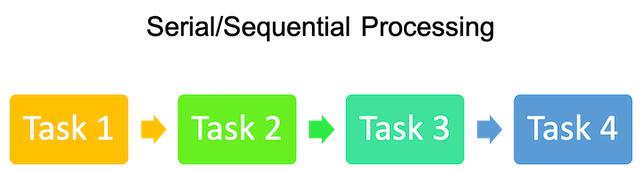

In [13]:
#Tenemos una función que va a calcular el cuadrado de cualquier número
def square(x):  
    return x*x
#Y una lista de números entre 0 y 99 
data = [x for x in range(100)]

In [14]:
#Vamos a obtener una lista que haga una lista con los cuadrados de los números de la lista 
#Primero va a calcular el cuadrado de 0, luego de 1 y así hasta llegar al 99

seq = [square(x) for x in data]
print(seq)
%time   #Nos dice el tiempo que tardó en aplicar la función a cada elemento.

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]
Wall time: 0 ns


# Procesamiento en Paralelo

Si quiseramos que la función anterior se aplicara al mismo tiempo a todos los elementos, tendríamos que dividir el trabajo entre los núcleos disponibles.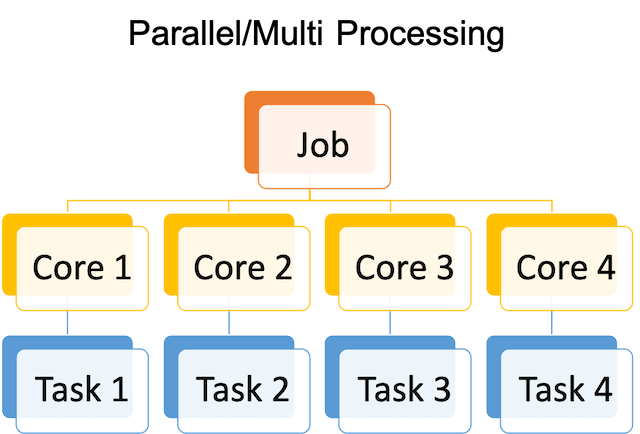
* Tendríamos que llamar a la clase _Pool_ desde la librería _Multiprocessing_ para ejecutar la función square en paralelo.
* Después tendríamos que llamar al método _Terminate_ para detener y cerrar el trabajo.
* Luego al método join para evitar cualquier proceso "zombie" que pueda resultar de que un proceso secundario continúe después de que un proceso primario haya finalizado.


In [ ]:
#time
pool = multiprocessing.Pool()
result = pool.map(square, data)
pool.terminate()
pool.join()
print(result)


In [ ]:
#Ejemplo
obtendremos una lista de los directorios usando el listdirmétodo de la osbiblioteca. Vamos a eliminar un archivo oculto llamado .DS_Store que se creó automáticamente en el directorio porque no es una carpeta y solo queremos una lista de carpetas en las que podamos buscar.

In [10]:
import os

dirs = os.listdir('C:/Users/iVoy/Downloads/directories')
dirs.remove('.DS_Store')


ValueError: list.remove(x): x not in list

In [ ]:
#A continuación, definiremos una función que buscará en una carpeta de directorio determinada y extraerá una lista de archivos que terminan con la extensión de archivo .md.
def find_markdowns(dir):
    files = os.listdir(dir)
    markdowns = [dir +'/' + file for file in files if file.endswith('.md')]
    return markdowns


In [ ]:
#Esta función puede aplicarse a la lista iterable al igual que nuestra squarefunción podría aplicarse a la lista de números en nuestro ejemplo anterior.
#Apliquemos esta función a nuestra lista de directorios de forma secuencial, cronometremos la ejecución y veamos qué tan rápido puede identificar todos los archivos de rebajas. Para hacer esto, aplicaremos la función dentro de una comprensión de lista a cada directorio de nuestra lista de directorios. Esto producirá una lista de listas, que luego aplanaremos en una sola lista que contiene la ubicación de todos los archivos de descuento como elementos.

%time
result = [find_markdowns(dir) for dir in dirs]
flatten = [file for sublist in result for file in sublist]


In [ ]:
#Veamos si podemos lograr ganancias de rendimiento aplicando la función al iterable en paralelo. 
#Como antes, vamos a llamar a la Poolclase y luego asignar la función al iterable. También vamos a aplanar los resultados aquí tal como lo hicimos para la ejecución secuencial.

%time
pool = multiprocessing.Pool()
result = pool.map(find_markdowns, dirs)
pool.terminate()
pool.join()
flatten = [file for sublist in result for file in sublist]
